<a href="https://colab.research.google.com/github/ayush100497/ayush100497/blob/main/Copy_of_EDA_Team_Book_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### **Team Members - Durgesh Mishra , Anamika , Ayush Goyal**

# <font color='orange'> Hotel Booking Analysis</font> 

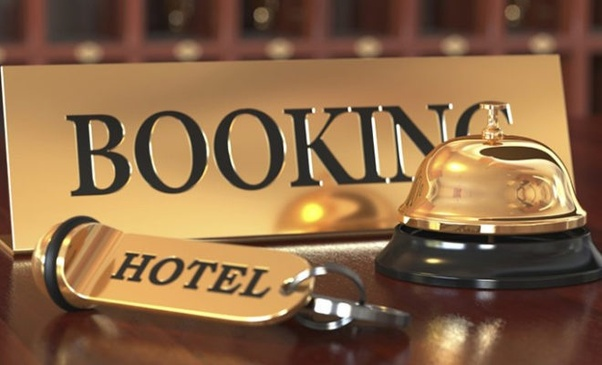

 Before starting our analysis the first question thats comes in my mind is,

 # <font color='skyblue'>  What is Exploratory Data Analysis?</font> 

Basically it is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it.




Exploratory Data Analysis helps us to –

* To give insight into a data set.

* Understand the underlying structure.

* Extract important parameters and relationships that hold between them.

* Test underlying assumptions

This data set is ideal for anyone looking to practice their exploratory data analysis (EDA) or get started in building predictive models!

We can divide the Hotel Booking EDA into 2 sections:

* In the first part we deal with Data Collection, Data Exploration, Data Cleaning, etc.

* In the second part we extract information from our data and try to answer some really important questions that govern the bookings.

#Data collection:


**Importing the required libraries for EDA:**

To start with, we have imported all the necessary libraries for this analysis i.e pandas, numpy, matplotlib.pyplot, plotly, seaborn & datetime.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
from datetime import datetime as dt
from datetime import time 
from datetime import date

<font color='red'>WARNING!!</font> 


Warnings are good but some times unnecessary, so to avoid this i have imported the warnings and **ignored** the future warnings.  :P

Mounting the Google Drive to Google Colab:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the data into the data frame:**

Loading the data into the pandas data frame is certainly one of the most important steps in EDA.

Read the csv file using read_csv() function of pandas library where each data is separated by the delimiter “,” in given data set.

In [ ]:
hotel_df = pd.read_csv("/content/drive/MyDrive/Team capstone project/Hotel Bookings.csv")

#Data Exploration:


In [ ]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [ ]:
hotel_df.shape

(119390, 32)

Data set contains 119390 Rows & 32 columns/features

In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**What stands out from the dataset?**

 * There is a max lead time of 737 days! Do hotels even allow that? Is that a good data point?

* Someone stayed 19 weekend nights.

* Looking at stays_in_week_nights, this seems plausible as a 50 weekday stretch would be 10 weeks.

* 55 adults in a single room? 10 children? 10 babies?

* $5,400 for an average daily rate?

* 8 Parking spots? I guess that can work with 55 adults.

* 391 days in waiting list.

* 21 booking changes 


# <font color='orange'>Data Cleaning:</font> 
* Data cleaning can be a very tedious task believe me.

* It’s the start of a new project and you’re excited to apply some machine learning models.  You take a look at the data and quickly realize it’s an absolute mess.

* According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data.

**Identifying and Handling Duplicate Data:**

It is necessary to determine whether the data you are using has duplicated rows. We are going to identify duplicate rows and handle it.

In [ ]:
duplicate_rows = hotel_df[hotel_df.duplicated()]
print(duplicate_rows.shape) 

(31994, 32)


There are 31994 duplicate rows in the dataset. We are going to drop the  duplicate rows which might cause problems during the analysis.

In [ ]:
hotel_df = hotel_df.drop_duplicates()
hotel_df.shape

(87396, 32)

After dropping the duplicate rows, we are left with 87396 rows.

**Identifying and Handling Missing Data:**

* In my opinion, handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.

* In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed. 

We will detect missing values and handle them in a proper and efficient way by first finding columns with missing values.



In [ ]:
# Finding features/columns with Nan values 
features_with_null_values = [feature for feature in hotel_df.columns if hotel_df[feature].isnull().sum()>1]
features_with_null_values

['children', 'country', 'agent', 'company']

There are 4 Columns  'children', 'country', 'agent', 'company' with missing values. Now we are going to calculate null percentage for each columns

In [ ]:
print(round(100*(hotel_df.isnull().sum()/len(hotel_df.index)),3))

hotel                              0.000
is_canceled                        0.000
lead_time                          0.000
arrival_date_year                  0.000
arrival_date_month                 0.000
arrival_date_week_number           0.000
arrival_date_day_of_month          0.000
stays_in_weekend_nights            0.000
stays_in_week_nights               0.000
adults                             0.000
children                           0.005
babies                             0.000
meal                               0.000
country                            0.517
market_segment                     0.000
distribution_channel               0.000
is_repeated_guest                  0.000
previous_cancellations             0.000
previous_bookings_not_canceled     0.000
reserved_room_type                 0.000
assigned_room_type                 0.000
booking_changes                    0.000
deposit_type                       0.000
agent                             13.951
company         

As we can see the company column has quite alot of NaN values, about 94% data is missing followed by agent column with about 14% data is missing.


<font color='pink'> Garbage In Garbage Out!! </font> 


**Feature selection:**

* Feature selection is one of the first and important steps while performing any machine learning task. Not necessarily every column (feature) is going to have an impact on the analysis. 

* If we add these irrelevant features in the model, it will just make the model worst. This gives rise to the need of doing feature selection.

Dropping company column because more than 90% of data is missing & Dropping arrival_dat_week_number & agent as it is unnecessary for this data analysis.

In [ ]:
hotel_df.drop(columns= ["agent", "company","arrival_date_week_number"], inplace= True)
hotel_df.shape

(87396, 29)

**Droping NaN values:**


Dropping 456 NaN rows from the dataset, as this null rows only account for about 0.5% of the total rows.

In [ ]:
# Droping NaN values 
hotel_df = hotel_df.dropna()
hotel_df.shape

(86940, 29)



**Converting datatype & replacing values:**

Converting Datatype for Children column from float type to integer type because we can't have number of childrens in float.



In [ ]:
hotel_df["children"] = hotel_df["children"].astype('int64')

Replacing value 1 with "Yes" and 0 with "No" for "is_canceled"& "is_repeated_guest" columns because its more intuitive and easy to interpret.

In [ ]:
hotel_df["is_canceled"].replace([1,0],["Yes","No"], inplace =  True)
hotel_df["is_repeated_guest"].replace([1,0],["Yes","No"], inplace =  True)

**Datetime operations :**

dt.strptime (string parser)  will convert a string format to datetime format.

In [ ]:
hotel_df["reservation_status_date"] = hotel_df["reservation_status_date"].apply(lambda x: dt.strptime(x, "%Y-%m-%d"))

**Dealing with Outliers:**

There are certain things which, if are not done in the EDA phase, can affect further statistical/Machine Learning modelling. One of them is finding “Outliers”.

Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.



By defining a function 'remove_outlier', the end result is the list of all those data items that satisfy the outlier definition according to the method used and removing the outliers values for individual columns.

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1                                               #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

Creating different dataframes for confirmed bookings, canceled bookings and repeated guest from our dataset

In [ ]:
#repeated guests
rep_guest = hotel_df[hotel_df['is_repeated_guest'] == "Yes"]

#Cancelled and non cancelled
hotels_not_cancelled = hotel_df[hotel_df['is_canceled'] == "No"]
hotels_cancelled = hotel_df[hotel_df['is_canceled'] == "Yes"]

In [ ]:
#calculating total nights as a sum of weekday and weekend nights
hotel_df["total_nights"] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']
hotel_df['new_days_in_waiting_list'] = hotel_df['days_in_waiting_list'].mean()

#assigning variables to months
hotel_df['month_number'] = hotel_df['arrival_date_month'].replace({ "January" : "A January", 'February' : "B February", 'March' : "C March", 'April' : "D April",'May' : "E May",'June' : 'F June','July' : 'G July','August' : 'H August','September' : 'I September','October' : 'J October','November' : 'K November','December' : "L December"},inplace = True)

#Year and month together by converting it to strings as only two strings will addup
hotel_df['year_month'] = hotel_df['arrival_date_year'].astype(str) + " " + hotel_df['arrival_date_month'].astype(str)

#Sort year_month in ascending
hotel_df.sort_values("year_month", axis = 0, ascending = True, inplace = True)

#Now let’s do the fun part, extract the information from our data and try to answer our questions.We will try to answer the following questions:


1. Types of hotel booking done by a customer & booking ratio between the different types?

2. Distribution of booking(Total, Confirmed, Canceled)

2. From which country most visitors come from?

3. Which was the most booked accommodation type (Single, Couple, Family)?

5. How many nights visitors prefer to stay in the hotel?

6. ADR(Average Daily Rate) for Market segments?

7.  Bi-Variate Analysis!!

8. What are the Reserved & Assigned room type bookings, Also ADR for Reserved room type & Assigned room type

9. Looking into price per month of hotel.

10. Types of meal booked by the customers?

11. Relation between Lead Time & Cancelation 

12. Customer Type for hotels

13. Number of repeated guest and customer type.

14. Relation between repeated customer and cancellation.

15. Market Segments for hotels

16. Relation between market segment and days on waiting list.

17. What is the percentage of repeating customers

18. Check the trend of arrivals of all months

19. Proportion of waiting days below and above average(doubt)

18. Highest proportion of nights by each market segment

19. which hotel has higher cancellation rate ?

20. What is the cancellation percentage according to market segment ?

21. What is the proportion of booking cancellation?

22. What is the booking ratio of city hotels and resort hotels?

23. Are guests travelling in solo or family ?

24. Cancellation status per month per year.

25. Comparison of waiting days per month per year for cancelled hotels and arrivals.














# **Contribution Summary**
Data cleaning and basic data analysis on bookings,visitors and country, ADR for reserved room type and assigned room type, meals prefered by customer and no. of stays by **Durgesh Mishra**

Cancellation with respect to lead time , repeated guest and deposit.
Relation between days on waiting list and market segments. ADR in respect of months done by **Anamika**.

Cancellation ands waiting of resort and city hotels.
Arrivals, cancellation percentage, waiting days according to market segment done by **Ayush Goyal**.

#**1. Types of hotel booking done by the customers & booking ratio between the different types of hotel.**

To answer this question, we will start by plotting a histogram for the hotel column in our dataset.

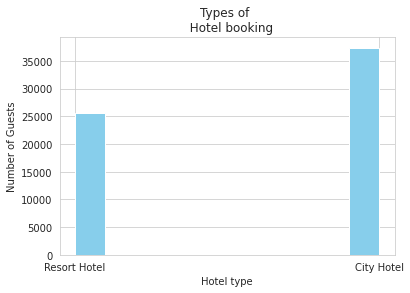

In [ ]:
# Plotting types of hotel bookings
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
plt.hist(hotels_not_cancelled.hotel, color="skyblue")
plt.xlabel("Hotel type")
plt.ylabel("Number of Guests")
plt.title("Types of \n  Hotel booking");

This data set contains various booking information between two hotels i.e City hotel and a Resort hotel. Now lets have an overview of  the actual count for the hotels of confirmed bookings only.

In [ ]:
hotels_not_cancelled.groupby("hotel")["is_canceled"].count().rename_axis('Hotels').reset_index(name='Number of Visitors ')

,Hotels,Number of Visitors
0,City Hotel,37377
1,Resort Hotel,25576


**Conclusion :** There are 2 types of booking Resort Hotel & City Hotel. The Number of Guests for Resort Hotels is around 37000 & for City Hotels is around 25000. 

In [ ]:
#booking ratio
booking_ratio = hotels_not_cancelled['hotel'].value_counts().reset_index()
booking_ratio.rename(columns={"index":"Hotels", "hotel":"Number_of_visitors"},inplace= True)
ratio = booking_ratio['Number_of_visitors'][0]/booking_ratio['Number_of_visitors'][1]
print(booking_ratio)
print(f'Our required ratio between city hotel and resort hotel is {ratio}. This means city hotel accounts for {ratio} times more bookings.')

         Hotels  Number_of_visitors
0    City Hotel               37377
1  Resort Hotel               25576
Our required ratio between city hotel and resort hotel is 1.461409133562715. This means city hotel accounts for 1.461409133562715 times more bookings.


 **Conclusion :** There are 2 types of booking Resort Hotel & City Hotel. The Number of Guests for Resort Hotels is around 37000 & for City Hotels is around 25000. Our required ratio between city hotel and resort hotel is 1.461409133562715. This means city hotel accounts for 1.461409133562715 times more bookings.


Now lets find booking ratio between the different types of hotel using a pie plot.

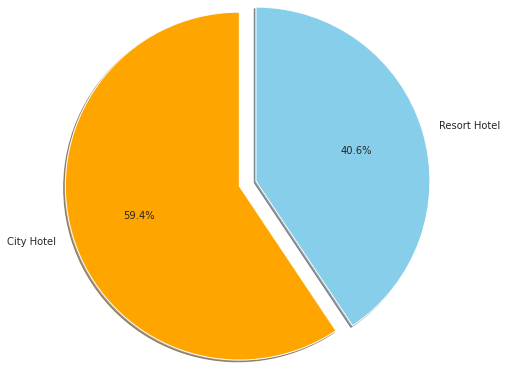

In [ ]:
list1 = hotels_not_cancelled["hotel"].value_counts().tolist()

# As the name suggest, explode will determine how much each section is seperated from each other
exp = [0,0.2]

# Determine the color of the piechart
cl = ['orange','skyblue']

plt.pie(list1, labels=["City Hotel","Resort Hotel"], autopct='%1.1f%%', radius = 2,  explode=exp, colors=cl, shadow=True, startangle=90);

**Conclusion :**
Around 60% booking is done in City Hotels as compared to Resort Hotels. This could be because city hotels tend to be cheaper, everything is more accessible and more suitable for individuals or small groups of visitors.

 As Resort hotels tend to have less bookings in comparison to city hotels so they need to work on their marketing strategy and promote the hotels more, especially on social media.

Resort hotels could also reduce prices to increases booking percentages.

 Resort hotel tend to be an expensive side and most people will stick to city hotels.
Also , resort hotels tend to be appropriate for larger group of people.

# **2.Distribution of booking(Total, Confirmed and Canceled)**

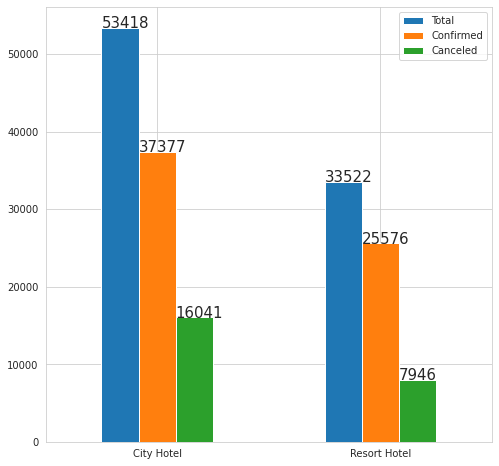

In [ ]:
#Plotting distribution of Total, Confirmed $ Canceled booking

hotel_df_dist = pd.concat([hotel_df.hotel.value_counts(), hotel_df[hotel_df.is_canceled == "No"].hotel.value_counts(), hotel_df[hotel_df.is_canceled == "Yes"].hotel.value_counts()], axis=1)
hotel_df_dist.columns = ['Total','Confirmed','Canceled']
ax = hotel_df_dist.plot.bar(rot=0, figsize=(8,8))

for p in ax.patches:
  ax.text(p.get_x(),p.get_height(), f"{int(p.get_height())}", fontsize=15)


**Conclusion :** 

:> 72% confirm rate for city hotel, 79% confirm rate for resort hotel.

:> 28% cancel rate for city hotel, 21% cancel rate for resort hotel. 

We can see that we have approximately 30% of the bookings cancellations and 70% are not being cancelled. It is a good sign but we should still take measures to control and reduce the amount of bookings cancelled.

Huge proportion of cancelation belongs to from city hotels. This was expected since 3/4th of the hotel booking belongs to city hotels.

#**3. From which country most visitors come from?**

To see the country wise comparison plot the country column. In the country column, we have codes for each country like PRT for Portugal , GBR for United Kingdom and so on. Categories are represented in the ISO 3155–3:2013 format.

In [ ]:
visitors_from_diffrent_countries = hotel_df[hotel_df['is_canceled'] == "No"].groupby(['country']).size().reset_index(name ='count')

#we will be using plotly.express to plot a chloropleth map.
px.choropleth(visitors_from_diffrent_countries, locations = "country", color ="count", hover_name = "country",
              color_continuous_scale=px.colors.sequential.Plasma, title="Home country of visitors")

In [ ]:
country_df = hotels_not_cancelled["country"].value_counts().reset_index()
country_df.rename(columns={"index":"country", "country":"count"}, inplace=True)
country_df.set_index("country", inplace=True)

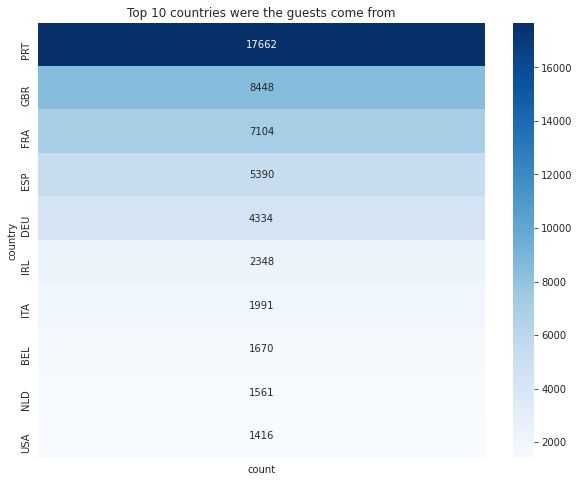

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Top 10 countries were the guests come from")
sns.heatmap(country_df[:10], annot= True, fmt="d", cmap="Blues");

**Conclusion :** From the plot of  the top 10 countries were the guests come from,

A very high proportion of travellers have their nationality Portugal as "PRT" that is 17662 after that we have Great Britain "GBR" travellers that is 8448 and then comens FRA > ESP > DEU.

We should mainly focus on the key aspects of lifestyles of these countries to make our travellers happy and increase repeating customers as most of our travellers are coming from the above countries only.

# **4. Which was the most booked accommodation type (Single, Couple, Family)?**

We will divide people staying in the hotel into 3 categories.

* Single: 1 Adult only

* Couple: 2 Adults we can’t say for sure that these two people are an actual couple or not, data does not tell us anything about this, but surely with no children or babies.

* Family / Friends or group: More than 2 people including adults, children, and babies.

In [ ]:
single   = hotels_not_cancelled[(hotels_not_cancelled.adults==1) & (hotels_not_cancelled.children==0) & (hotels_not_cancelled.babies==0)]
couple   = hotels_not_cancelled[(hotels_not_cancelled.adults==2) & (hotels_not_cancelled.children==0) & (hotels_not_cancelled.babies==0)]
family   = hotels_not_cancelled[((hotels_not_cancelled.adults + hotels_not_cancelled.children + hotels_not_cancelled.babies) > 2) ]

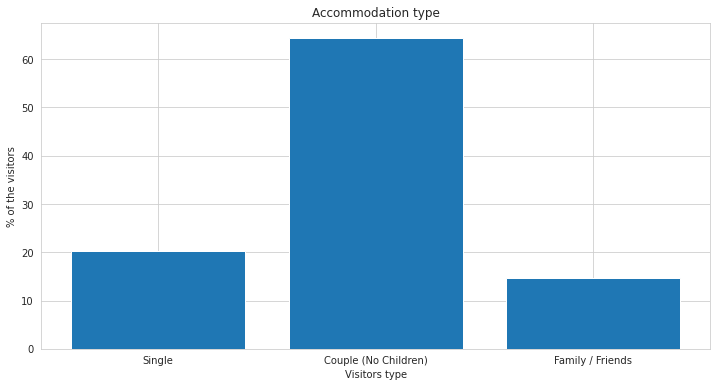

In [ ]:
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/hotels_not_cancelled.shape[0]*100 for x in count]

plt.subplots(figsize=(12,6))
plt.bar(names, count_percent)
plt.xlabel("Visitors type")
plt.ylabel("% of the visitors")
plt.title("Accommodation type");

**Conclusion:** Couple (or 2 adults) is the most popular accommodation type with about 65%. For both hotels, it is common for poeple to not bring children or babies along but if they do, at most 1-2 children or 1 baby. The hotels could advertise in ways that attract couples more and also business travellers.


# **5. How many nights does visitors prefer to stay in the hotel?**

Lets create a new columns with the total number of nights stayed at the hotel, i.e Number of weekend nights (Saturday or Sunday) + Number of week nights (Monday to Friday) the guest booked to stay at the hotel.

In [ ]:
hotels_not_cancelled["total_nights"] = hotels_not_cancelled['stays_in_weekend_nights'] + hotels_not_cancelled['stays_in_week_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
staying_nights = hotels_not_cancelled["total_nights"].value_counts().reset_index()
staying_nights.rename(columns={"index":"total_nights", "total_nights":"count"}, inplace=True)
staying_nights["% of guest"]= (staying_nights["count"]*100)/staying_nights["count"].sum()
staying_nights = staying_nights.sort_values(by = "total_nights", ascending=True,  ignore_index=True)
staying_nights.head()

,total_nights,count,% of guest
0,0,617,0.980096
1,1,13814,21.943355
2,2,11435,18.164345
3,3,12456,19.786190
4,4,9416,14.957190


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



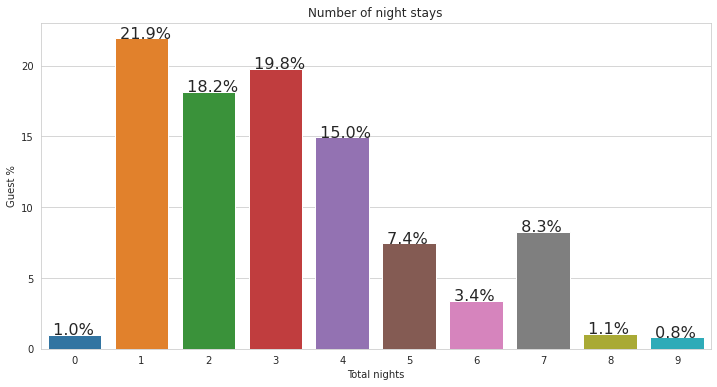

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot("total_nights", "% of guest", data = staying_nights[0:10] )
ax.set(xlabel="Total nights", ylabel = "Guest %")
ax.set_title("Number of night stays");
for p in ax.patches:
  ax.text(p.get_x(),p.get_height(), f" {round(p.get_height(),1)}%", fontsize=16)

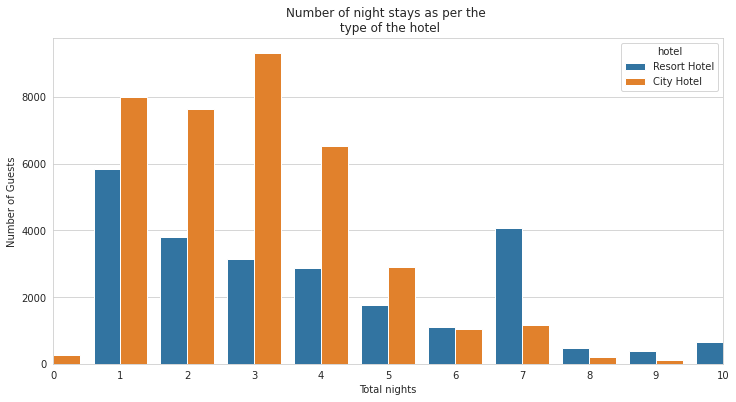

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x="total_nights", hue = "hotel", data = hotels_not_cancelled)
ax.set(xlabel="Total nights", ylabel = "Number of Guests")
ax.set(xlim=(0, 10))
ax.set_title("Number of night stays as per the \n type of the hotel");

**Conclusion:**
Most people stay upto 4 nights. More than 70% of guests come under these category


# **6. ADR(Average Daily Rate)**
ADR is the only variable related to price in this dataset.

average daily rate =  𝑆𝑢𝑚𝑂𝑓𝐴𝑙𝑙𝐿𝑜𝑑𝑔𝑖𝑛𝑔𝑇𝑟𝑎𝑛𝑠𝑎𝑐𝑡𝑖𝑜𝑛/𝑇𝑜𝑡𝑎𝑙𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝑆𝑡𝑎𝑦𝑖𝑛𝑔𝑁𝑖𝑔ℎ𝑡 

 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



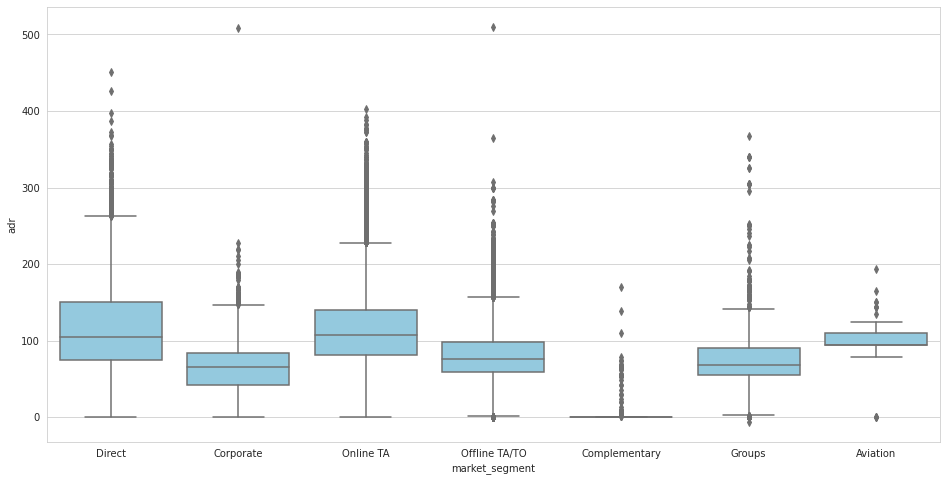

In [ ]:
df2 = hotels_not_cancelled[hotels_not_cancelled["adr"]<=1000]
fig, ax1= plt.subplots(figsize=(16,8))
ax1 = sns.boxplot(df2.market_segment, df2.adr, color = 'skyblue');

**Conclusion:** Aviation has the lowest variation of prices which is usually because these segments have contracts with flat prices and are not yieldable like other segments.

In [ ]:
#Removing outliers 
df3 = remove_outlier(hotels_not_cancelled, "adr")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



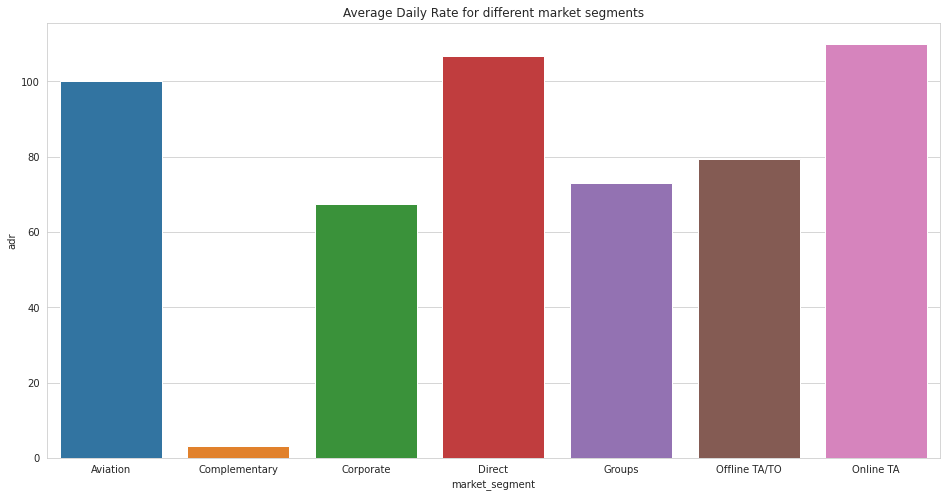

In [ ]:
grp1 = df3.groupby("market_segment").mean().reset_index()
fig, plot = plt.subplots(figsize=(16,8))
plot = sns.barplot("market_segment","adr", data = grp1)
plot.set_title("Average Daily Rate for different market segments");

**Conclusion:**  Direct and Online TA are the market segments with highest prices and higher variation, showing well how yield revenue management is a good thing.

#Looking into price per month of a hotel


average daily rate per person =  𝐴𝐷𝑅/𝐴𝑑𝑢𝑙𝑡𝑠+𝐶ℎ𝑖𝑙𝑑𝑟𝑒𝑛 

In [ ]:
# Calculating average daily rate per person
hotel_df['adr_pp'] = hotel_df['adr'] / (hotel_df['adults'] + hotel_df['children']) 
actual_guests =hotel_df.loc[hotel_df["is_canceled"]=="No"]
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



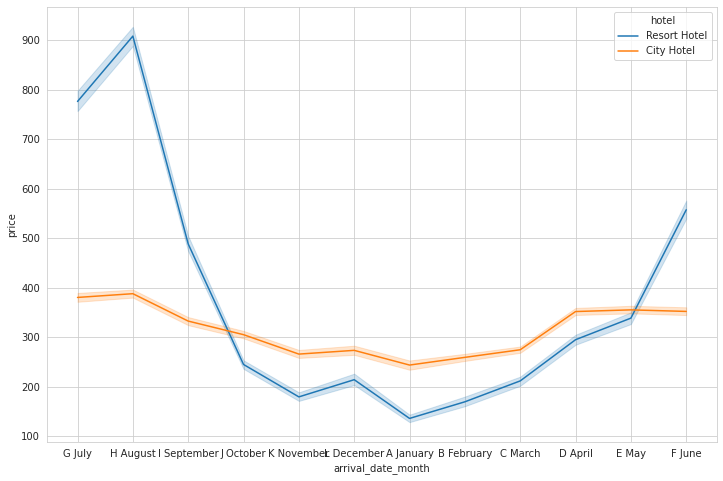

In [ ]:
# Resizing plot 
plt.figure(figsize=(12,8))
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel');

Seasonal effect are present for both hotel but to diffrent degree and with diffrent profiles. For City Hotels the month of April, May and August coincide with the highest adr while the lowest was during the middle of winter((Nov-Jan). Seasonal effects at Resort Hotel are even more pronounced with greater fluctuation in adr throughout the year than the City Hotel and a more defined peak in the month of August and dip during the winter.

# **7. Bi-Variate Analysis**

One of the best way to find the relationship between the features can be done using heat maps. Let’s plot the heatmap and see the correlation with the help of seaborn!!

*   Positive correlation is represented by dark shades 
*   Negative correlation is represented by lighter shades.

Light & dark shades same as those fair and lovely ads -_-



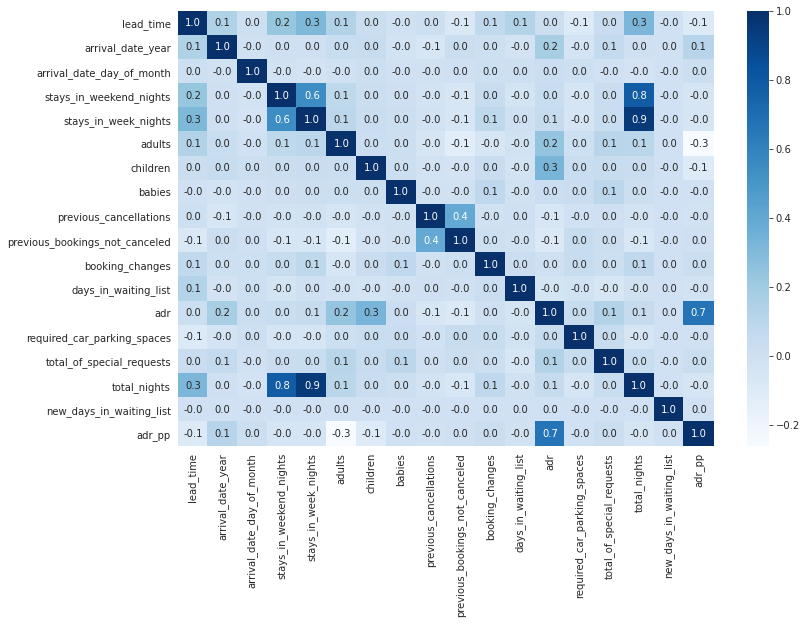

In [ ]:
fig, axes = plt.subplots(figsize=(12,8))
sns.heatmap(hotel_df.corr(), cmap="Blues", fmt=".1f",annot= True);

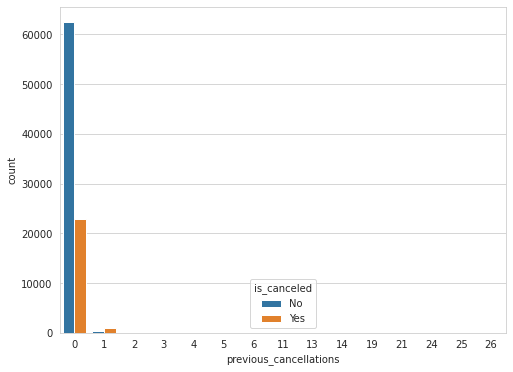

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=hotel_df, x='previous_cancellations', hue='is_canceled');

Maximum customers have 0 previous cancellations. They are less likely to cancel the current booking. However, customers who have cancelled once earlier are more likely to cancel the current booking. This also matches with the positive correlation between previous_cancellations and is_cancelled .

# **8. What are the Reserved room type & Assigned room type bookings. ADR for Reserved room type & Assigned room type.**

Code is presented instead of designation for anonymity reasons.


Some of the Room types are Single room, Double room, Triple room, Queen, King, Deluxe Room, Quad room.

Code for the type of room reserved for the booking.

In [ ]:
reserved_room = hotels_not_cancelled['reserved_room_type'].value_counts(normalize=True).rename_axis('reserved_room_type').reset_index(name='Booking % for Reserved room type')
reserved_room["Booking % for Reserved room type"] = reserved_room["Booking % for Reserved room type"]*100

Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. 

Code for the type of room assigned to the booking.

In [ ]:
assigned_room = hotels_not_cancelled['assigned_room_type'].value_counts(normalize=True).rename_axis('assigned_room_type').reset_index(name='Booking % for Assigned room type')
assigned_room["Booking % for Assigned room type"] = assigned_room["Booking % for Assigned room type"]*100

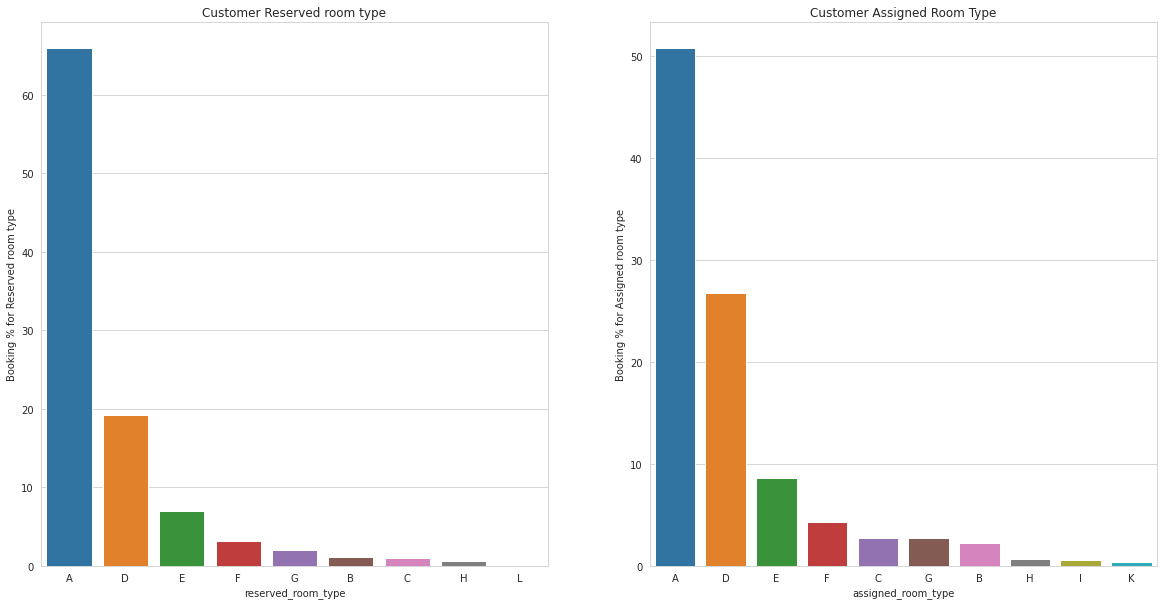

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10)) 

plt.subplot(1, 2, 1)
sns.barplot(x='reserved_room_type', y='Booking % for Reserved room type', data= reserved_room)
plt.title('Customer Reserved room type')

plt.subplot(1,2,2)
sns.barplot(x='assigned_room_type', y='Booking % for Assigned room type', data= assigned_room)
plt.title('Customer Assigned Room Type');

**Conclusion:** As for anonymity reasons, code is presented instead of designation.

The Types of Reserved rooms are A, B, C, D, E, F, G, H, L.

Room Type A & D seems very popular among the customers. 

The maximum bookings of around 66% are reserved for the room type A, followed by at 19% reserved for the room type D.

The Types of Assigned rooms are A, B, C, D, E, F, G, H, I, K.

The maximum bookings are assigned for the room type A i.e around 51% out of 66% of the reserved room type for A.


Lets find out Adr for Reserved room type & Assigned room type.

In [ ]:
adr_reserved_room =  hotels_not_cancelled.groupby("reserved_room_type")["adr"].mean().rename_axis('reserved_room_type').reset_index(name='ADR for Reserved type')
adr_assigned_room =  hotels_not_cancelled.groupby("assigned_room_type")["adr"].mean().rename_axis('assigned_room_type').reset_index(name='ADR for Assigned type')

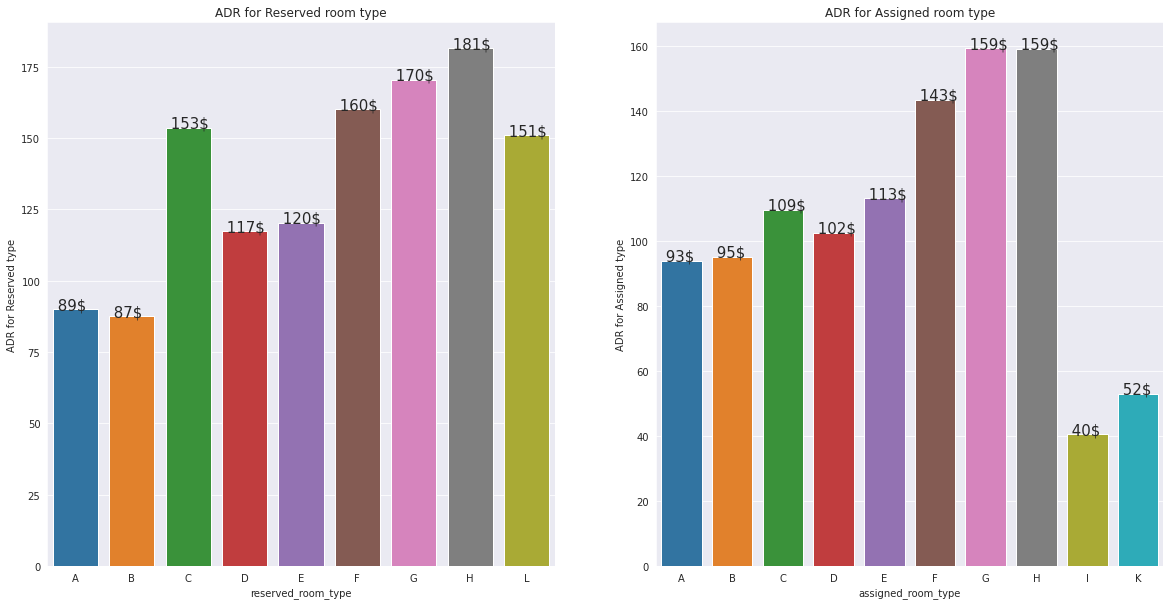

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10)) 

plt.subplot(1, 2, 1)
ax = sns.barplot(x='reserved_room_type', y='ADR for Reserved type', data= adr_reserved_room)
plt.title('ADR for Reserved room type')
for p in ax.patches:
   ax.text(p.get_x(),p.get_height(), f" {int(p.get_height())}$", fontsize=15)

plt.subplot(1, 2, 2)
ax = sns.barplot(x='assigned_room_type', y='ADR for Assigned type', data= adr_assigned_room)
plt.title('ADR for Assigned room type');
for p in ax.patches:
   ax.text(p.get_x(),p.get_height(), f" {int(p.get_height())}$", fontsize=15)

**Conclusion:** 
ADR is highest for Reserved room type H followed by Reserved room type G, chances are these room types are luxurious accommodation, like Deluxe room, Executive Suite, Terrace Suite, Penthouse Suite.

ADR for room type  A & B are the lowest.

As Couple (or 2 adults) is the most popular accommodation type with about 65%, so my guess is Room type A & D can be Single room & Double room because these are most booked room types in hotel industry.

Some room types determined by bed availability as

Queen-sized bed, King-sized bed, a room with two twin-sized beds.

 Also the adr corresponding to the room type A & D are among the lowest.

# **9. Types of meal booked by the customers?**
Type of meal booked. Categories are presented in standard hospitality meal packages.

Undefined/SC – no meal package

 BB – Bed & Breakfast
 
  HB – Half board (breakfast and one other meal – usually dinner)
  
  FB – Full board (breakfast, lunch and dinner)




In [ ]:
meal = hotels_not_cancelled['meal'].value_counts()/len(hotels_not_cancelled['meal'])*100
meal  = meal.rename_axis('Meal_type').reset_index(name='Percentage')
meal

,Meal_type,Percentage
0,BB,78.701571
1,HB,10.498308
2,SC,9.740600
3,Undefined,0.644926
4,FB,0.414595


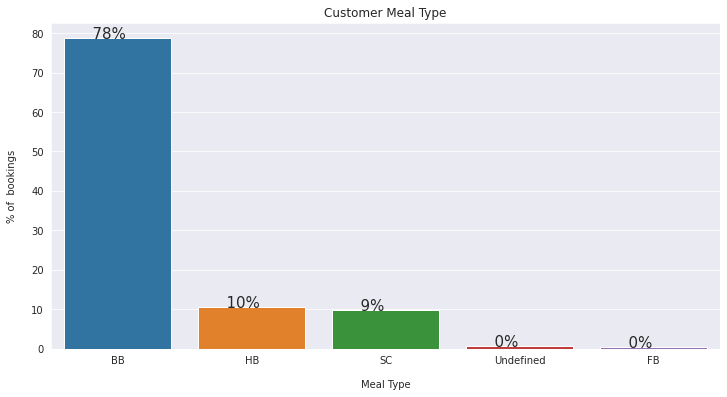

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Meal_type', y='Percentage', data= meal)
plt.title('Customer Meal Type')
plt.xlabel("Meal Type", labelpad=14)
plt.ylabel("% of  bookings", labelpad=14);
for p in ax.patches:
  ax.text(p.get_x(),p.get_height(), f"      {int(p.get_height())}% ", fontsize=15)

**Conclusion:** Most bookings by Customers are Bed & Breakfast as much as 79%.

Half board (breakfast and one other meal – usually dinner) meals has booking as much as 10%.

Full board (breakfast, lunch and dinner) meal bookings are negligible.

Around 10% customers prefer no meal bookings.


Most customers prefer to book include Breakfast, which's the usual complimentary if someone wants to book a hotel. In case they don't have time to find breakfast outside the hotel. Some of them around 10% book with another meal, usually dinner. Them who came with business interests can get more resting time to not find any dinner outside hotel anymore.

Cancellation with respect to lead time , repeated guest $ deposit.
Relation between days on waiting list and market segments done by Anamika.

# **10. Relation between Lead Time & Cancelation Rate?**

Lead time column in the data set implies that the number of days that elapsed between the entering date of the booking into the PMS and the arrival date.


In [ ]:
#Box plot showing how lead time effects cancellation
fig = px.box(hotel_df, x='hotel', y='lead_time', color='is_canceled', notched=True)
fig.update_layout(title='Booking Cancelations by lead Time and Hotel',
                  xaxis_title='Hotel',
                  yaxis_title='Booking Lead Time(Days)')
#using this to show plot
fig.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



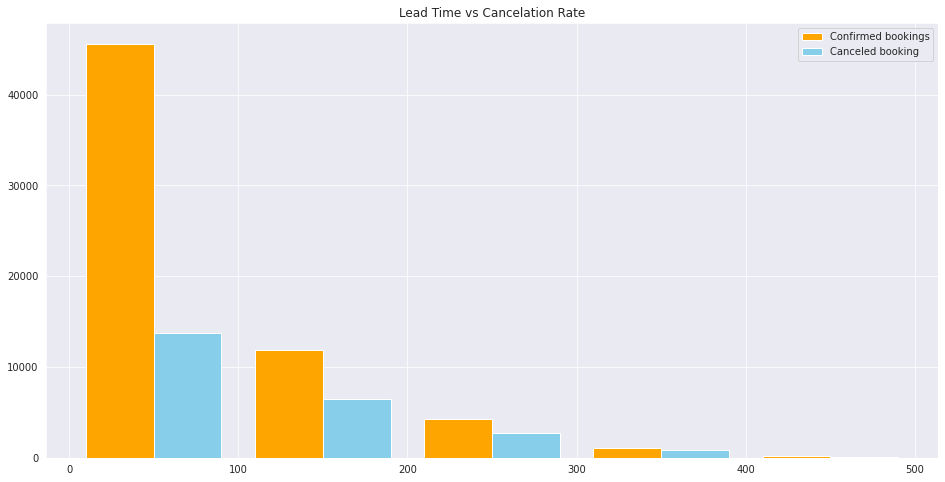

In [ ]:
fig, plot = plt.subplots(figsize=(16,8))
plt.title("Lead Time vs Cancelation Rate")
plt.hist([hotels_not_cancelled.lead_time, hotels_cancelled.lead_time], color = ["orange","skyblue"], bins= np.arange(0, 600,100));
plt.legend(["Confirmed bookings", "Canceled booking"]);

**Conclusion:**  It is clear that in the first 100 days of the lead time we have the highest cancelation. Also the density of  the cancelation decreases as the lead time increases still the cancelation rate increases as the lead time increases.

Further lets find relation between Lead Time & Cancelation Ratio.

In [ ]:
cut_bins = [0, 100,200,300,400,500,600]
temp3 = pd.cut(hotels_cancelled["lead_time"],bins= cut_bins).value_counts().rename_axis('Lead Time').reset_index(name='Canceled count')

In [ ]:
cut_bins = [0, 100,200,300,400,500,600]
temp4 = pd.cut(hotels_not_cancelled["lead_time"],bins= cut_bins).value_counts().rename_axis('Lead Time').reset_index(name='Not Canceled count')

In [ ]:
merged_df1 = pd.merge(temp3, temp4, how= "inner", on="Lead Time") 
merged_df1["Cancelation Rate"] =  merged_df1["Canceled count"]/merged_df1["Not Canceled count"] 
merged_df1

,Lead Time,Canceled count,Not Canceled count,Cancelation Rate
0,"(0, 100]",13509,40235,0.335752
1,"(100, 200]",6438,11758,0.547542
2,"(200, 300]",2641,4211,0.627167
3,"(300, 400]",894,1050,0.851429
4,"(400, 500]",115,151,0.761589
5,"(500, 600]",34,28,1.214286


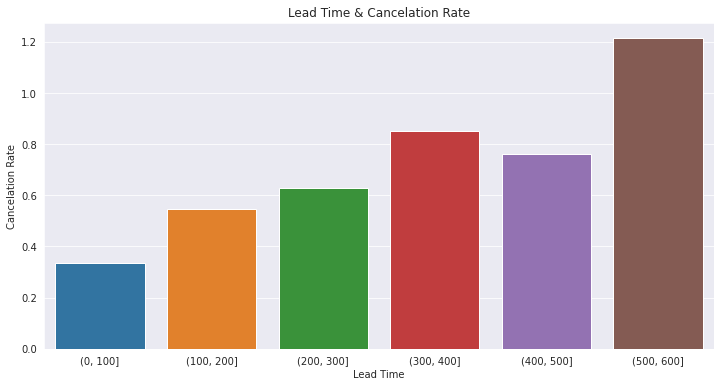

In [ ]:
plt.subplots(figsize=(12,6))
sns.barplot(x = "Lead Time", y = "Cancelation Rate", data= merged_df1)
plt.title('Lead Time & Cancelation Rate');

**Conclusion:** We can clearly make the inference that Cancellation rate is directly proportional to the Lead time i.e as the Lead time increases the cancellation rate also increases.



In [ ]:
hotels_cancelled.lead_time.agg(['min','mean','max'])

min       0.000000
mean    105.820611
max     629.000000
Name: lead_time, dtype: float64

In [ ]:
hotels_not_cancelled.lead_time.agg(['min','mean','max'])

min       0.000000
mean     70.428621
max     737.000000
Name: lead_time, dtype: float64

**Conclusion**
It is clear that booking made with larger lead times were more frequently canceled at both hotels. A possible explanation for this is that booking made far ahead of the arrival date provide more time for the travel plans of the guests to change.For example , someone who is booking a stay on monday for Friday of the same week may be more likely to have definitive travel plans and follow through with the booking than someone booking 6 month in advance.
In average cancelled bookings were made  3 months ahead while confirmed were made 2 months ahead.
For extreme case , the longest canceled booking was made 1 year and 8 months ahead while comparing to 2 years ahead for the confirmed cases.

#How many days ahead usually people book?

In [ ]:
hotel_df.lead_time.agg(['min','mean','max'])

min       0.000000
mean     80.193375
max     737.000000
Name: lead_time, dtype: float64

**Conclusion:** 
Guests usually make a booking 2-3 months ahead.

 Extreme cases such as someone booked on the same day they checked in or someone made a booking 2 years ahead

# **11. Customer Type for hotels**

Customer type column in the data set implies that the type of booking, assuming one of four categories:

 Contract - when the booking has an allotment or other type of contract associated to it;

  Group – when the booking is associated to a group; 

  Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 

  Transient-party – when the booking is transient, but is associated to at least other transient booking

  Lets count the number of confirmed bookings for the customer types.

In [ ]:
temp = pd.DataFrame(index= hotels_not_cancelled.groupby('customer_type').sum().index)

for hotel in hotels_not_cancelled['hotel'].unique():
  temp[hotel] = hotels_not_cancelled[hotels_not_cancelled['hotel']==hotel]['customer_type'].value_counts()
    
temp = temp.sort_values('City Hotel',ascending=False)

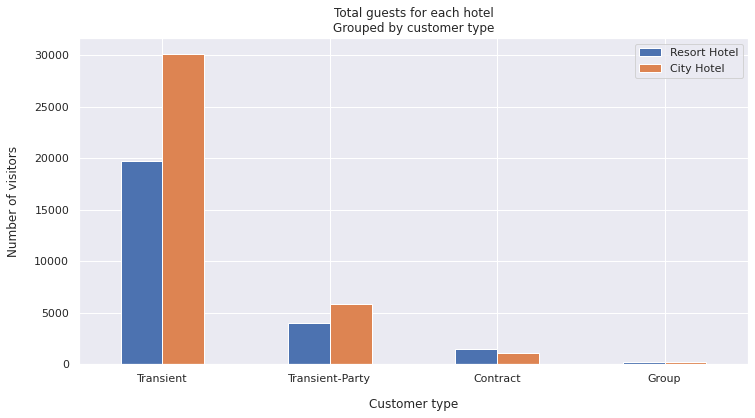

In [ ]:
sns.set(font_scale=1)
temp.plot(kind="bar", title="Total guests for each hotel\nGrouped by customer type", figsize=( 12,6), rot=0)
plt.xlabel("Customer type", labelpad=14)
plt.ylabel("Number of visitors", labelpad=14);

**Conclusion:**   Clearly Transient customers are more popular in hotel bookings i.e  guests who are predominantly on-the-move and seek short (and often urgent!) hotel-stays. 

Such guests are usually not looking for anything more than a basic service: a clean and comfortable room for the night, and a nice breakfast in the morning. 

With ease of booking directly from the website, most people tend to skip middleman to ensure quick response from thier booking.

# **12. Number of Repeated guest and customer type**

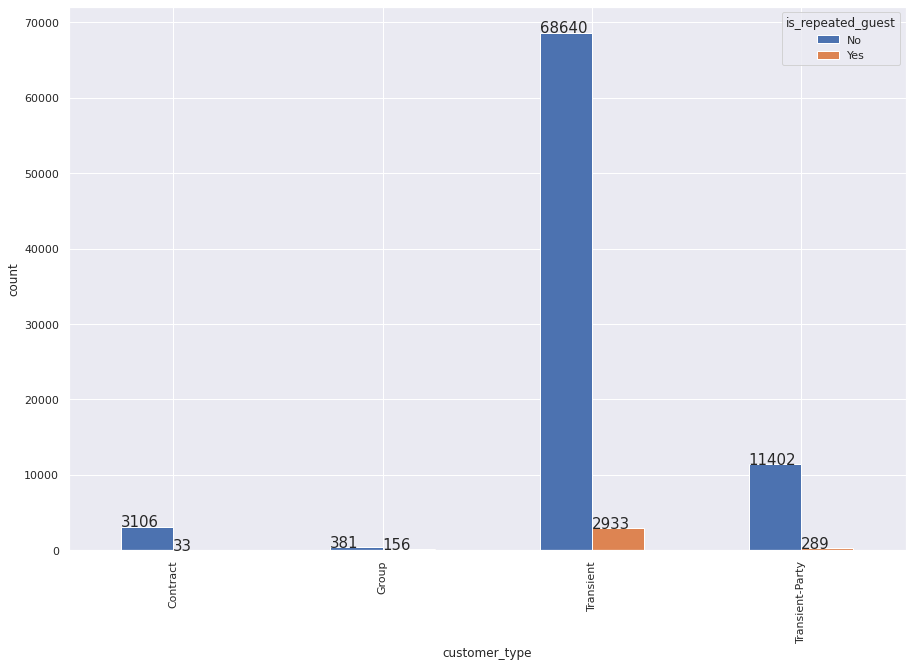

In [ ]:
deposit = hotel_df[['customer_type','is_repeated_guest']]
pivot = pd.pivot_table(deposit, index='customer_type', columns='is_repeated_guest', aggfunc=len)
deposit = list(pivot.index)

ax= pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(15,10)
ax.set_xlabel("customer_type")
ax.set_ylabel("count")

for p in ax.patches:
  ax.text(p.get_x(),p.get_height(), f"{int(p.get_height())}", fontsize=15)


 **Conclusion**
As we see in this graph there are only 3415 repeated guest. 85%  repeated guest belong to transient. Hotel should do more advertisement work and give better quality service to increase their repeated guest.
 Majority of bookings are transient(out of 87370 booking 69031 booking is of transient). This means that booking is not a part of group or contract. With ease of booking directly from the website, most people tend to skip middleman to ensure quick response from thier booking.

# **13. Relation between repeated customer and cancelation**

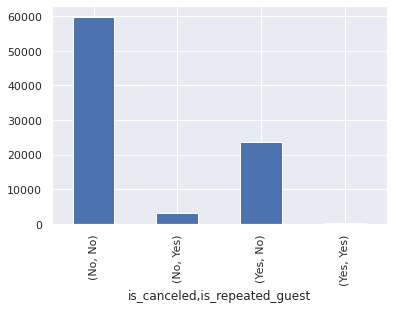

In [ ]:
hotel_df["is_canceled"].replace([1,0],['Yes','No'],inplace=True)
hotel_df["is_repeated_guest"].replace([1,0],['Yes','No'], inplace=True)
df=hotel_df.groupby(['is_canceled','is_repeated_guest']).size()
df.plot(kind='bar');

**Conclusion** This is an important visualtization to find out whether the hotel booking is cancelled and whether the customer is repeated guest or not.

We see that when the hotel booking is cancelled and customer is a repeated guest then entry is almost zero. which means that repeated guest is less likely to cancelled his booking.

# **14. Market Segments for hotels**

Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [ ]:
temp = pd.DataFrame(index= hotels_not_cancelled.groupby(hotels_not_cancelled['market_segment']).sum().index)

for hotel in hotels_not_cancelled['hotel'].unique():
    temp[hotel] = hotels_not_cancelled[hotels_not_cancelled['hotel']==hotel]['market_segment'].value_counts()

temp = temp.sort_values('City Hotel',ascending=False)

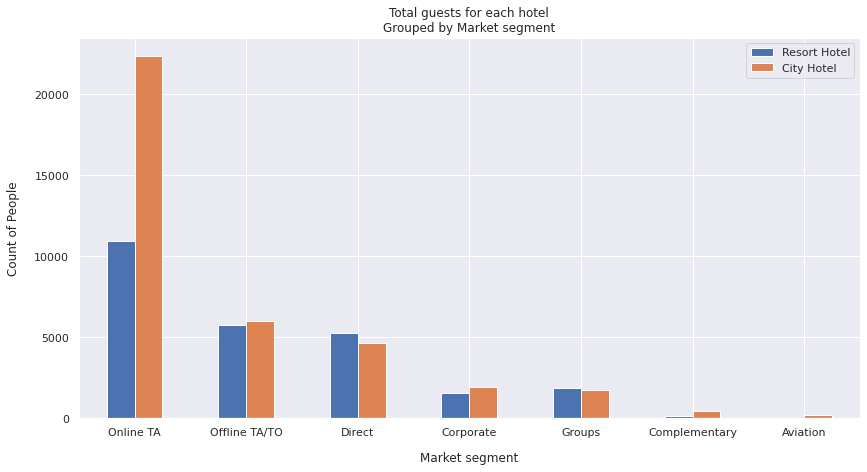

In [ ]:
sns.set(font_scale=1)
temp.plot(kind="bar", title="Total guests for each hotel\nGrouped by Market segment", figsize=( 14,7), rot=0)
plt.xlabel("Market segment", labelpad=14)
plt.ylabel("Count of People", labelpad=14);

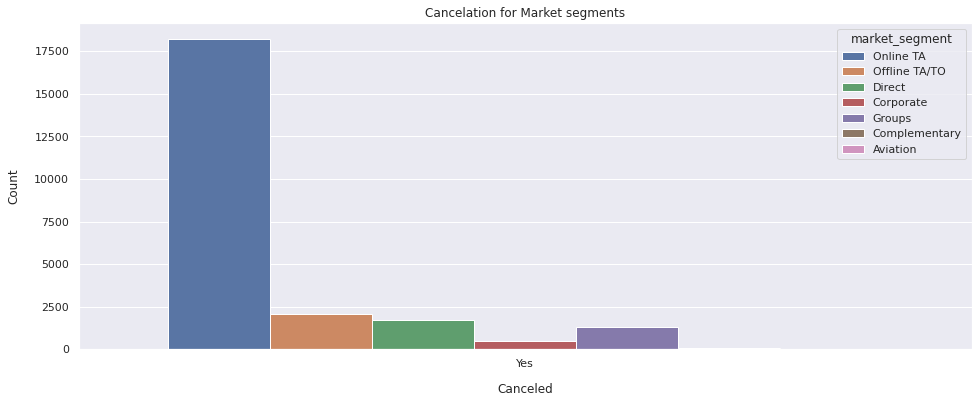

In [ ]:
plt.figure(figsize=(16,6))
ax = sns.countplot(data= hotels_cancelled ,x="is_canceled",hue='market_segment')
plt.title('Cancelation for Market segments')
plt.xlabel("Canceled", labelpad=14)
plt.ylabel("Count", labelpad=14);

**Conclusion:**  Maximum cancelation are for Online travel agent & lowest cancelation are for Aviation

#**14 A) Highest Proportion of nights by each market segment**

Highest bookings are by: 

  market_segment  total_nights  proportion_of_stay(in %)
0      Online TA        111739                 50.802924
1  Offline TA/TO         56067                 25.491257
2         Direct         30662                 13.940695
3         Groups         12734                  5.789603
4      Corporate          7032                  3.197148
5  Complementary          1040                  0.472843
6       Aviation           672                  0.305530


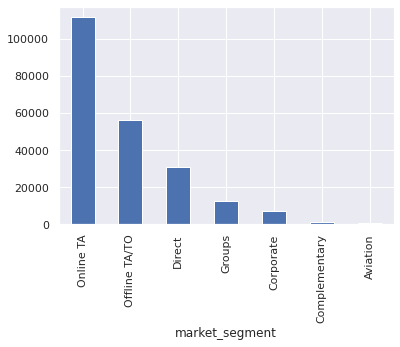

In [ ]:
# Here we will print the highest number of bookings by each market segment
print('Highest bookings are by: \n')
high_bookings = hotels_not_cancelled.groupby('market_segment')['total_nights'].sum().sort_values(ascending = False).plot(kind ='bar' )
high_bookings_hotel_df = hotels_not_cancelled.groupby('market_segment')['total_nights'].sum().sort_values(ascending = False).reset_index()
high_bookings_hotel_df['total_nights']
high_bookings_hotel_df['proportion_of_stay(in %)'] = high_bookings_hotel_df['total_nights']/high_bookings_hotel_df['total_nights'].sum()*100
print(high_bookings_hotel_df)

**Conclusion:** Out of total, Online TA accounts the responsibility of more than 50% of the business due to their booking ratio after which we have OfflineTA/TO responsible for approximately 25% of the total hotel business. These two market segments seems to be the important aspect after which rest of the 25% of the ratio includes groups, corporates, aviationa and direct.

#**14 B) What is the cancellation percentage according to market segment?**

In [ ]:
#creating two data frames booking nights and customer cancellations
highest_booking = hotels_not_cancelled.groupby('market_segment')['total_nights'].sum().sort_values(ascending = False)
customer_cancel = hotels_cancelled.groupby('market_segment')['is_canceled'].count().reset_index()
cus = customer_cancel.reset_index()
high = highest_booking.reset_index()

,market_segment,total_nights,index,is_canceled,Cancel percentages
0,Online TA,111739,6,18244,16.327334
1,Offline TA/TO,56067,5,2057,3.668825
2,Direct,30662,3,1723,5.619333
3,Groups,12734,4,1335,10.483744
4,Corporate,7032,2,497,7.067691
5,Complementary,1040,1,86,8.269231
6,Aviation,672,0,45,6.696429


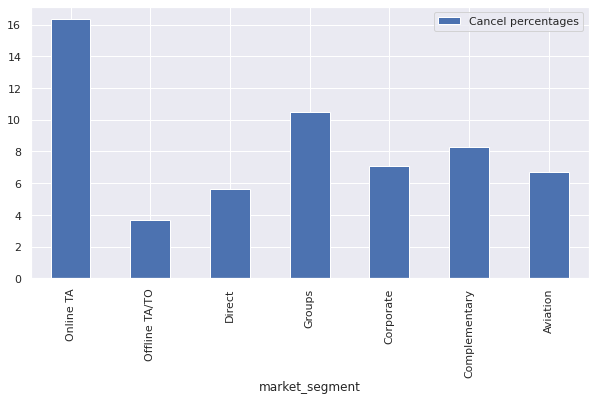

In [ ]:
# make line
# Merging two dataframes using outer join
highest_booking_merge = pd.merge(high, cus, on ='market_segment', how ='outer')
highest_booking_merge['Cancel percentages'] = highest_booking_merge['is_canceled']/highest_booking_merge['total_nights']*100
highest_booking_merge.sort_values('Cancel percentages', ascending = False)
highest_booking_merge.plot(x='market_segment', y=['Cancel percentages'], figsize=(10,5), grid=True, kind ='bar')
highest_booking_merge

**Conclusion :** According to me we should focus on groups and Online TA as they are having highest number of cancellation proprtations and out this online TA wsa also having highest bookings. So we need to see why customers are cancelling it and should try to take necessary steps to reduce cancellations. As Online TA accounts approx 16.3% of bookings cancelled and groups accounts approximately 10.4% of bookings cancelled.


# **15.Relation between Deposit and Cancellation**

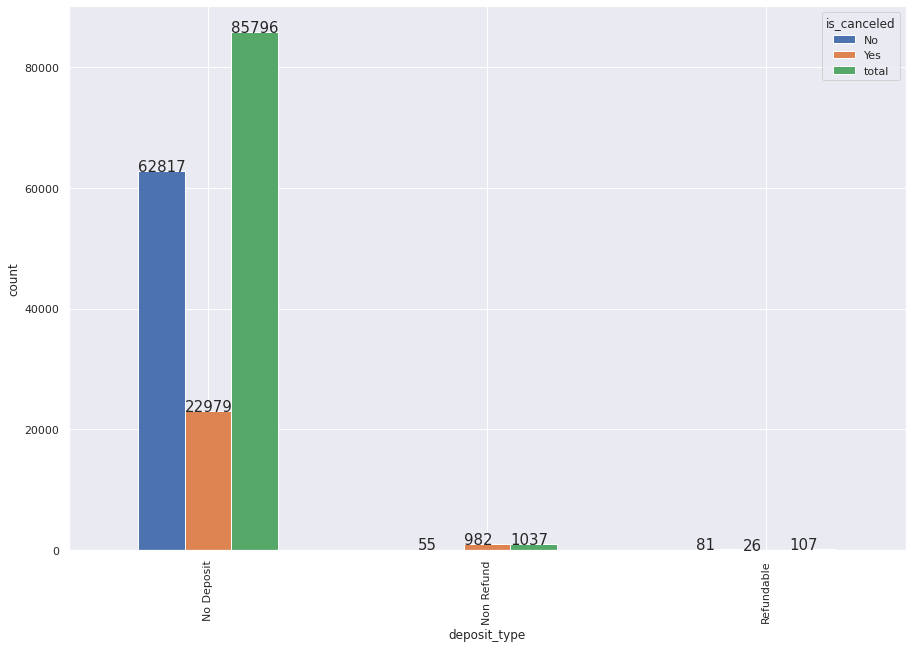

In [ ]:
#Plotting the relation between cancelation and deposit type
deposit = hotel_df[['deposit_type','is_canceled']]
pivot = pd.pivot_table(deposit, index='deposit_type', columns='is_canceled', aggfunc=len)
pivot['total'] = pivot["No"] + pivot["Yes"]

deposit = list(pivot.index)
count_stays = list(pivot['total'])
ax= pivot.plot(kind="bar")
fig = ax.get_figure()
#Changes the plot dimension
fig.set_size_inches(15,10)
# Change the axes labels
ax.set_xlabel("deposit_type")
ax.set_ylabel("count")
for p in ax.patches:
  ax.text(p.get_x(),p.get_height(), f"{int(p.get_height())}", fontsize=15)

# using plt.show to show the plot
plt.show()

Almost 23K bookings of deposit 'No_Deposit'were cancelled. These numbers are huge in the hotels were not able to replace the cancelled bookings in time. It's a significant loss for the hotel.
 Also it is intersting to note that non_refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposit have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

# **16.Relation between days on waiting list and market segments**

Text(0, 0.5, 'days on waiting list')

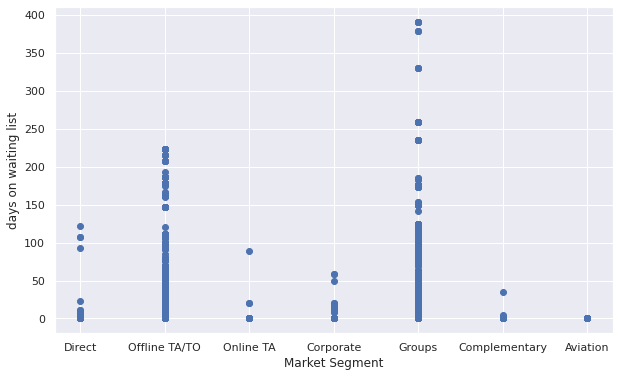

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(hotel_df['market_segment'], hotel_df['days_in_waiting_list'])
ax.set_xlabel('Market Segment')
ax.set_ylabel('days on waiting list')

**Conclusion**
 Aviation industry has the minimum number of days on waiting list.
 The reason for this might be that when the flight has to land at a location it shoulds provide immidiate accomodation to all of his working staff(like pilot, cabincrew), etc) .
 So they don't entertain hotels which put them on waiting list for too long.
 In general hotel mangement sees that they make arrngement immediatelty and provide rooms to them with almost zero waiting list.

### **Market segment, Cancellation and arrival status $ waiting days per month per year for cancelled booking done by Ayush Goyal.**

#**17) What is the percentage of repeating customers?**

,Hotels,Guests_arriving,Repeated_guests,Repitition%
0,City Hotel,37377,1708,5.0
1,Resort Hotel,25576,1703,7.0


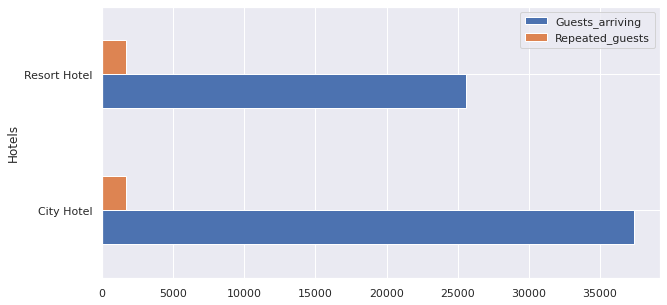

In [ ]:
#Total number of repeated guests grouped by hotel type
customer_count = rep_guest['hotel'].value_counts().reset_index()
#Total number of arrivals grouped by hotel type
guests_coming = hotels_not_cancelled['hotel'].value_counts().reset_index()
#assigning column values
guests_coming.columns = ['Hotels','Guests_arriving']
#Concat two dataframes
guests_coming = pd.concat([guests_coming,customer_count],axis =1)
#removing the duplicate column
guests_coming.pop('index')
guests_coming.columns = ['Hotels','Guests_arriving','Repeated_guests']
#calculating repitition percentage
guests_coming['Repitition%'] = round(guests_coming['Repeated_guests']/guests_coming['Guests_arriving']*100)
guests_coming
#plotting the repeated guest and total guests together
guests_coming.plot(x='Hotels', y=['Guests_arriving', 'Repeated_guests'], figsize=(10,5), grid=True, kind ='barh')
guests_coming

**Conclusion :** We can see that out of total customers arriving in in Resort hotels and City hotels we have an average percentage of 5% of repeating customers for city hotels and 7% for resort hotels. This is a small difference but it shows resort hotels are more successful in retaining their old customers.

Text(0, 0.5, 'count')

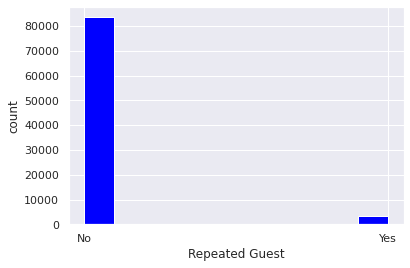

In [ ]:
#Number of repeated guest
hotel_df["is_repeated_guest"].replace([1,0],["Yes","No"], inplace=True) #[1=yes" means guest are repeated", 0=no"means guest are not repeated]
plt.hist(hotel_df.is_repeated_guest,color="blue")
plt.xlabel('Repeated Guest')
plt.ylabel('count')

**Conclusion :** We have an equal average of repeating customers visiting city hotel and resort hotel. This shows the regular visitors who prefer their stays in the particular hotel. Both of them have an almost equal repition rate - 1708 for city hotel that is 5% and 1703 for resort hotel taht is 7%.

#**18) Cancellation and arrival status per month per year?**

<bound method Series.reset_index of year_month        is_canceled
2015 G July       No             1149
                  Yes             512
2015 H August     No             1870
                  Yes             567
2015 I September  No             2259
                  Yes             560
2015 J October    No             2239
                  Yes             437
2015 K November   No             1402
                  Yes             243
2015 L December   No             1590
                  Yes             372
2016 A January    No             1515
                  Yes             301
2016 B February   No             2246
                  Yes             527
2016 C March      No             2911
                  Yes             885
2016 D April      No             2734
                  Yes            1012
2016 E May        No             2827
                  Yes             941
2016 F June       No             2595
                  Yes             910
2016 G July       No  

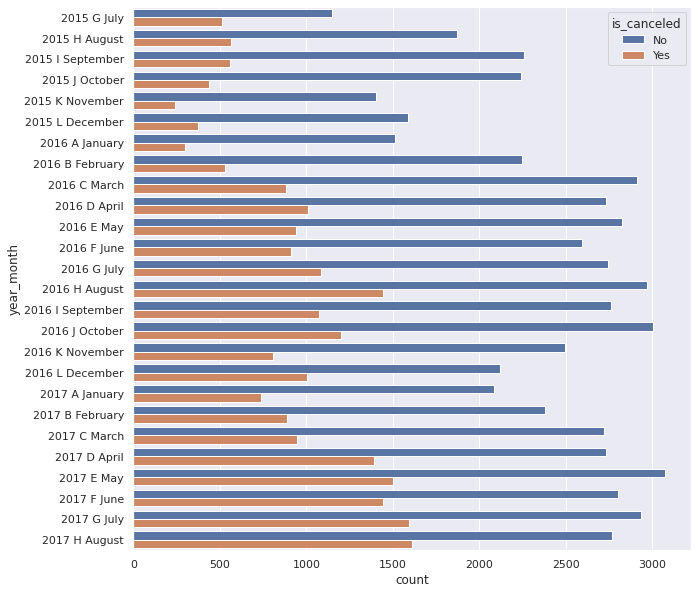

In [ ]:
#Import Seaborn library
f, ax = plt.subplots(figsize=(10, 10))
#Plot Cancellations and non cancellation year wise nad month wise to get a trend
sns.countplot(y="year_month", hue="is_canceled", data=hotel_df)
cancel_analysis = hotel_df.groupby('year_month')['is_canceled'].value_counts().reset_index
cancel_analysis


**Conclusion :** We have a cancellation increase of approximately 25% from july to october in 2015 and similarly increase of roughly 25 to 30% from july to october in 2016. In 2017 we have an increase of 20% approx after june till August. In the graph also we can clearly see that that the cancellation in the first 8 months of 2017 are getting quite higher as compared to previous years.
After analysing the trend of arrivals we got a continuous trend from July 2015 to August 2017. We can see that from October 2015 we had a sudden 30% decline of arrivals in the coming months of nov, dec and jav. Similarly in 2016, we also had a sudden decline of 17% in november and further a decline of 15% which is roughly 32% decline overall from november 2016 to january 2017. 

And we can also see that our cancellation rates has been increasing at an alarming rate from 2016 to 2017 whereas arrivals rate is increasing at slightly lower rate comparatively.

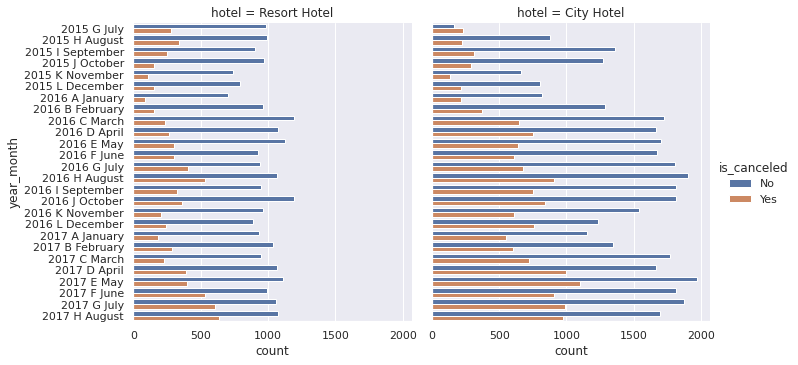

In [ ]:
 g = sns.catplot(y="year_month", hue="is_canceled", col="hotel",
                 data=hotel_df, kind="count"
                 );


**OR**



<bound method Series.reset_index of year_month        is_canceled
2015 G July       No              986
                  Yes             280
2015 H August     No              992
                  Yes             342
2015 I September  No              901
                  Yes             246
2015 J October    No              969
                  Yes             149
2015 K November   No              743
                  Yes             106
2015 L December   No              790
                  Yes             152
2016 A January    No              699
                  Yes              87
2016 B February   No              961
                  Yes             151
2016 C March      No             1190
                  Yes             238
2016 D April      No             1070
                  Yes             263
2016 E May        No             1127
                  Yes             298
2016 F June       No              922
                  Yes             298
2016 G July       No  

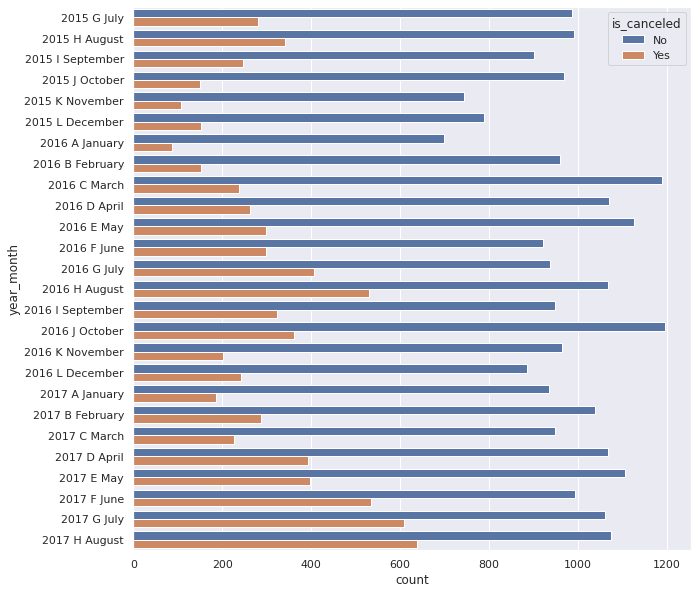

In [ ]:
resort_hotel=hotel_df[hotel_df['hotel']=='Resort Hotel']
city_hotel=hotel_df[hotel_df['hotel']=='City Hotel']

#Resort hotels arrivals and cancellations
f, ax = plt.subplots(figsize=(10, 10))
#Plot Cancellations and non cancellation year wise nad month wise to get a trend
sns.countplot(y="year_month", hue="is_canceled", data=resort_hotel)
resort_cancel_analysis = resort_hotel.groupby('year_month')['is_canceled'].value_counts().reset_index
resort_cancel_analysis


**Conclusion:** Arrivals of resort hotels have been quite stable from 2015 to 2017 almost between 1000 to 1200, however considering some exceptional months, like between july  to december we have slightly lower number of arrivals and lowest amount of cancellations comparatively whereas after jan till july it shows an increasing rate. Our cancellations have been below 500 but in 2017 after june they have been increasing rapidly and have been recorded as highest amount of cancellations till date that is crossing 600. Overall arrivals have high fluctuations and cancellations are giving us a trend.


In [ ]:
#city hotels and cancellations and arrivals
f, ax = plt.subplots(figsize=(10, 10))
#Plot Cancellations and non cancellation year wise nad month wise to get a trend
sns.countplot(y="year_month", hue="is_canceled", data=city_hotel)
city_cancel_analysis = city_hotel.groupby('year_month')['is_canceled'].value_counts().reset_index
city_cancel_analysis

**Conclusion :** Analysing city hotel, in july 2015 we had least arrivals and cancellations were even higher. But It had a rapid increase suddenly in july 2015 in the number of arrivals and cancellations have been controlled. In 2016 second and third quarters have recorded huge arrivals and slighly increased cancellations also comparatively. In forth quarter we have a rapid decline in arrival rate whereas cancellations remain almost constant. Overall there is  higher proportion of arrival rate which is a good sign as compared to resort hotels. In 2017 the cancellations have suddenly increased in second and third quarter but overall they have been quite sustained at their position.

#19) Comparison of waiting days per month per year for cancelled hotels and arrivals.

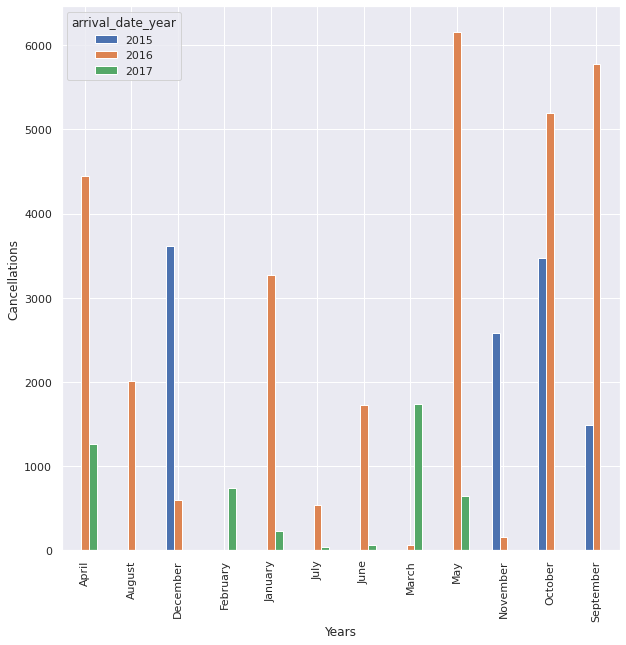

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,NaN,4442.0,1257.0
August,0.0,2009.0,0.0
December,3614.0,596.0,NaN
February,NaN,0.0,738.0
January,NaN,3265.0,229.0
July,0.0,534.0,34.0
June,NaN,1718.0,59.0
March,NaN,58.0,1737.0
May,NaN,6156.0,639.0


In [ ]:
#waiting days of every year per month for arrivals 
hotels_pivot = pd.pivot_table(
	hotels_not_cancelled,
	values="days_in_waiting_list",
	index="arrival_date_month",
	columns="arrival_date_year",
	aggfunc=np.sum
)

ax = hotels_pivot.plot(kind="bar")
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 10)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Cancellations")

# Use this to show the plot in a new window
plt.show()
print('\n\n\n')
hotels_pivot

**Conclusion :** For arrivals our waiting days in 2015 are quite higher from october to december, in 2016 our waiting days are quite high in jan, April to June,August to october. In 2017 our waiting days are quite high in the month of march, april.

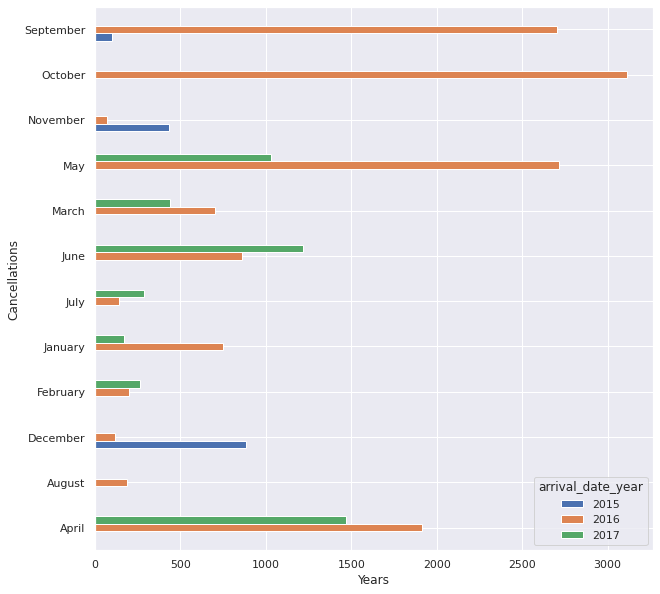

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,NaN,1915.0,1470.0
August,0.0,188.0,0.0
December,882.0,115.0,NaN
February,NaN,200.0,264.0
January,NaN,747.0,172.0
July,0.0,138.0,285.0
June,NaN,862.0,1219.0
March,NaN,701.0,438.0
May,NaN,2713.0,1028.0


In [ ]:
#waiting days of every year per month for cancellations
hotels_pivot = pd.pivot_table(
	hotels_cancelled,
	values="days_in_waiting_list",
	index="arrival_date_month",
	columns="arrival_date_year",
	aggfunc=np.sum
)

ax = hotels_pivot.plot(kind="barh")
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 10)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Cancellations")

# Use this to show the plot in a new window
plt.show()
print('\n\n\n')
hotels_pivot

**Conclusion :** As we had majority of cancellations in 3rd or 4th quarters as per data, but in case of waiting days of cancelled hotels we can see that in2015 higher waiting is in nov and dec. In 2016 higher waiting months are April, May, September, October. In 2017 from April to july there is significant amount of waiting. Overall waiting days seems to have no connection with the cancellations. 

# **Final Analysis**
# Here's what the hotels can do to improve business in the future:

# Resort hotels tend to have less bookings in comparison to city hotels so they need to work on their marketing strategy and promote the hotels more, especially on social media.
# Resort hotels could also reduce prices to increases booking percentages.
# May-August happens to be the busiest months but so the hotels should target more customers and try to do more business during these times.
# Although city hotels have more bookings, they also tend to have more cancellations so to prevent this they could take advance money during vacation. This would ensure most bookings to not being cancelled. They could also apply no-refund policies or make the refund policies rather strict so the customers choose not to cancel.
# It is quite clear most customers travel in pairs and bringing children or babies along are very rare so the hotels could advertise in ways that attract couples more and also business travellers.
# Most guests do not return but as these customers have already visited once, advertisements should be targeted in such ways so they are bound to return the next time they visit. The customers could also be offered special benefits if they do return to stay.
# 75% of Customers mostly prefer travel agents for their bookings whether offline or online, which means they prefer easy and hassle free bookings and we have very few groups and direct bookings. Online TA also has highest cancellation rate of more than 16% which can not be ignored  and on the top of it Groups are having cancellation rate of 10% despite having very few bookings. This also needs special attention. Various perks and benefits should be launched such as group discounts, room upgrades upon availability for direct booking customers and also offered happy hours if the room gets booked through direct reservation desk.
#In resort hotels July to december shows lower arrivals in 2015 - 16 and higher cancellation in 2017 after 2nd quarter, shows gives us a hint to focus on second and third quarter to control cancellation rates
# In city hotels Cancellation tends to be very high in first and third quarter in 2016 and similarly in 2017 it was higher in 1st quarter and shows about to increase pattern after second quarter. So we should focus on 1st and third quarters. 4th recorded the worst that is lowest number of arrivals and constant cancellations which is a major concern.

## **Happy Exploring!!**